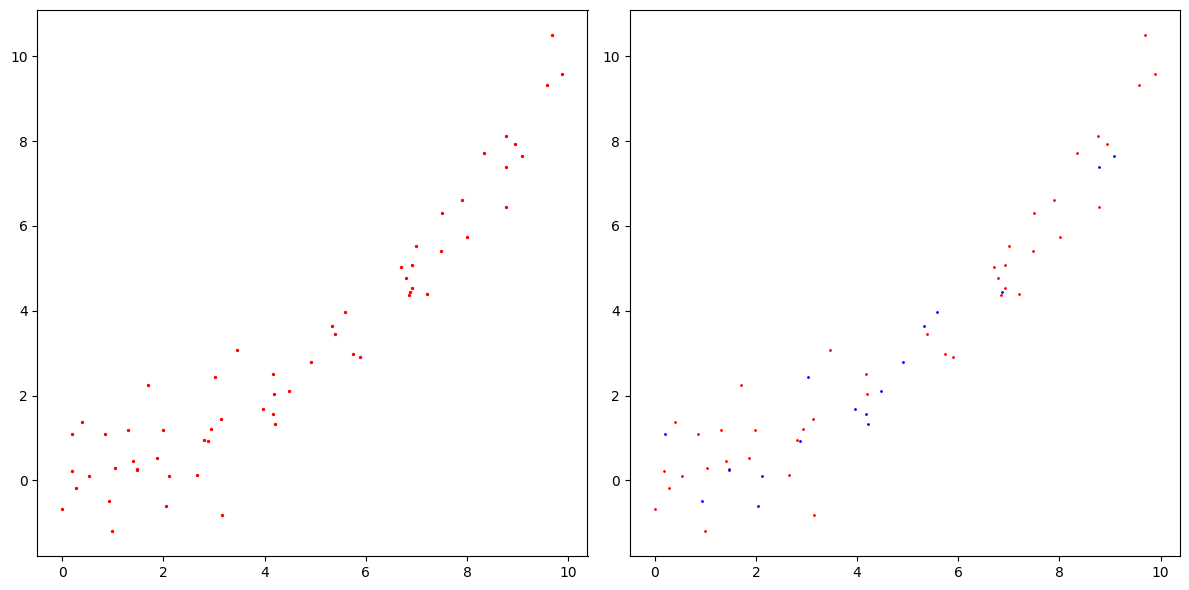

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso

# 创建一个窗口，设置子图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# 生成随机数据
rng = np.random.RandomState(1)
x = 10 * rng.rand(60)
y = x**2 / 10 + 0.9 * rng.randn(60)
# 绘制散点图
plt.scatter(x, y, c="red", s=2)


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    # x[:, np.newaxis] 将 x 转换为列向量（二维数组），y 保持一维。test_size=0.27 表示 27% 的数据将用于测试，73% 用于训练。random_state=42 确保每次运行时划分结果相同。
    x[:, np.newaxis],
    y,
    test_size=0.27,
    random_state=42,
)
plt.subplot(1, 2, 2)
# 绘制训练集和测试集的散点图
plt.scatter(X_train, y_train, c="red", s=1)
plt.scatter(X_test, y_test, c="blue", s=1)
plt.tight_layout()
plt.show()

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.420e+00, tolerance: 4.127e-02
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+01, tolerance: 4.127e-02
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+01, to

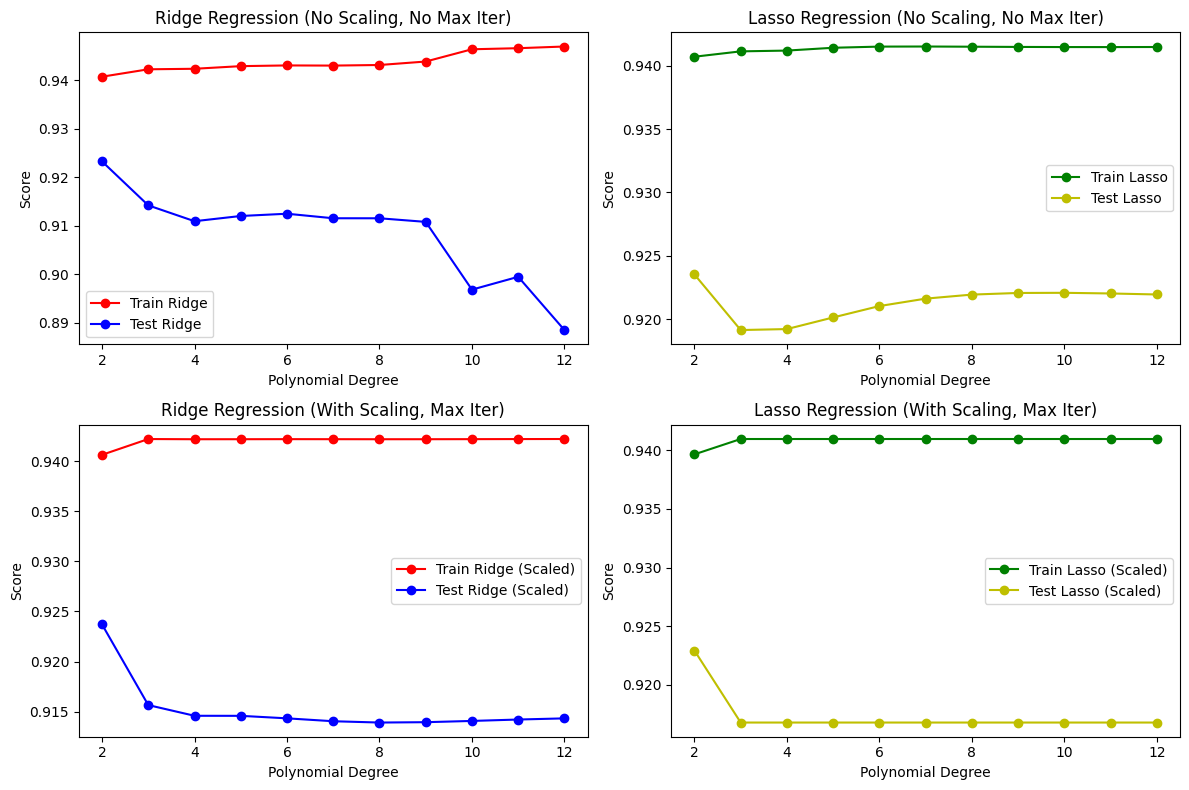

In [4]:
# 定义多项式的度数范围
degrees = list(range(2, 13))
# 初始化分数列表
scores_test_ridge = []
scores_train_ridge = []
scores_test_lasso = []
scores_train_lasso = []

# 初始化分数列表（带特征缩放和最大迭代次数）
scores_test_ridge_scaled = []
scores_train_ridge_scaled = []
scores_test_lasso_scaled = []
scores_train_lasso_scaled = []

# 循环训练模型并计算得分
for i in degrees:
    # Ridge模型（没有特征缩放和最大迭代次数）
    ridge_model = make_pipeline(PolynomialFeatures(degree=i), Ridge(alpha=0.1))
    ridge_model.fit(X_train, y_train)
    scores_test_ridge.append(ridge_model.score(X_test, y_test))
    scores_train_ridge.append(ridge_model.score(X_train, y_train))

    # Lasso模型（没有特征缩放和最大迭代次数）
    lasso_model = make_pipeline(PolynomialFeatures(degree=i), Lasso(alpha=0.1))
    lasso_model.fit(X_train, y_train)
    scores_test_lasso.append(lasso_model.score(X_test, y_test))
    scores_train_lasso.append(lasso_model.score(X_train, y_train))

    # Ridge模型（带特征缩放和最大迭代次数）
    ridge_model_scaled = make_pipeline(PolynomialFeatures(degree=i),
                                       StandardScaler(),  # 添加特征缩放
                                        Ridge(alpha=0.1, max_iter=10000))
    ridge_model_scaled.fit(X_train, y_train)
    scores_test_ridge_scaled.append(ridge_model_scaled.score(X_test, y_test))
    scores_train_ridge_scaled.append(ridge_model_scaled.score(X_train, y_train))

    # Lasso模型（带特征缩放和最大迭代次数）
    lasso_model_scaled = make_pipeline(PolynomialFeatures(degree=i), 
                                        StandardScaler(),  # 添加特征缩放
                                        Lasso(alpha=0.1, max_iter=10000))  # 增加最大迭代次数
    lasso_model_scaled.fit(X_train, y_train)
    scores_test_lasso_scaled.append(lasso_model_scaled.score(X_test, y_test))
    scores_train_lasso_scaled.append(lasso_model_scaled.score(X_train, y_train))

# 创建一个窗口，设置子图
plt.figure(figsize=(12, 8))

# Ridge得分图（没有特征缩放和最大迭代次数）
plt.subplot(2, 2, 1)
plt.plot(degrees, scores_train_ridge, "r-o", label='Train Ridge')
plt.plot(degrees, scores_test_ridge, "b-o", label='Test Ridge')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.title('Ridge Regression (No Scaling, No Max Iter)')
plt.legend()

# Lasso得分图（没有特征缩放和最大迭代次数）
plt.subplot(2, 2, 2)
plt.plot(degrees, scores_train_lasso, "g-o", label='Train Lasso')
plt.plot(degrees, scores_test_lasso, "y-o", label='Test Lasso')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.title('Lasso Regression (No Scaling, No Max Iter)')
plt.legend()

# Ridge得分图（带特征缩放和最大迭代次数）
plt.subplot(2, 2, 3)
plt.plot(degrees, scores_train_ridge_scaled, "r-o", label='Train Ridge (Scaled)')
plt.plot(degrees, scores_test_ridge_scaled, "b-o", label='Test Ridge (Scaled)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.title('Ridge Regression (With Scaling, Max Iter)')
plt.legend()

# Lasso得分图（带特征缩放和最大迭代次数）
plt.subplot(2, 2, 4)
plt.plot(degrees, scores_train_lasso_scaled, "g-o", label='Train Lasso (Scaled)')
plt.plot(degrees, scores_test_lasso_scaled, "y-o", label='Test Lasso (Scaled)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.title('Lasso Regression (With Scaling, Max Iter)')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

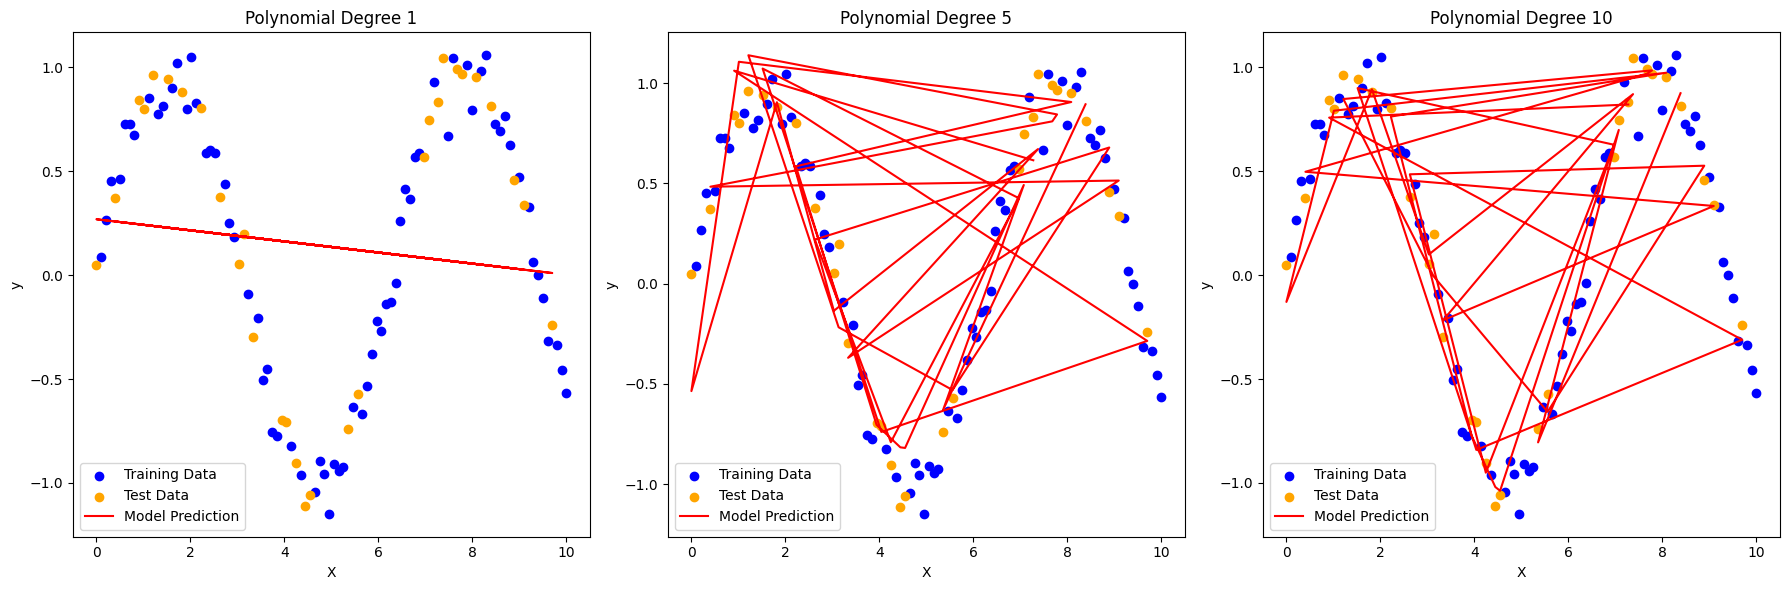

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.50116e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.658e+00, tolerance: 3.007e-03
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.50116e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number 

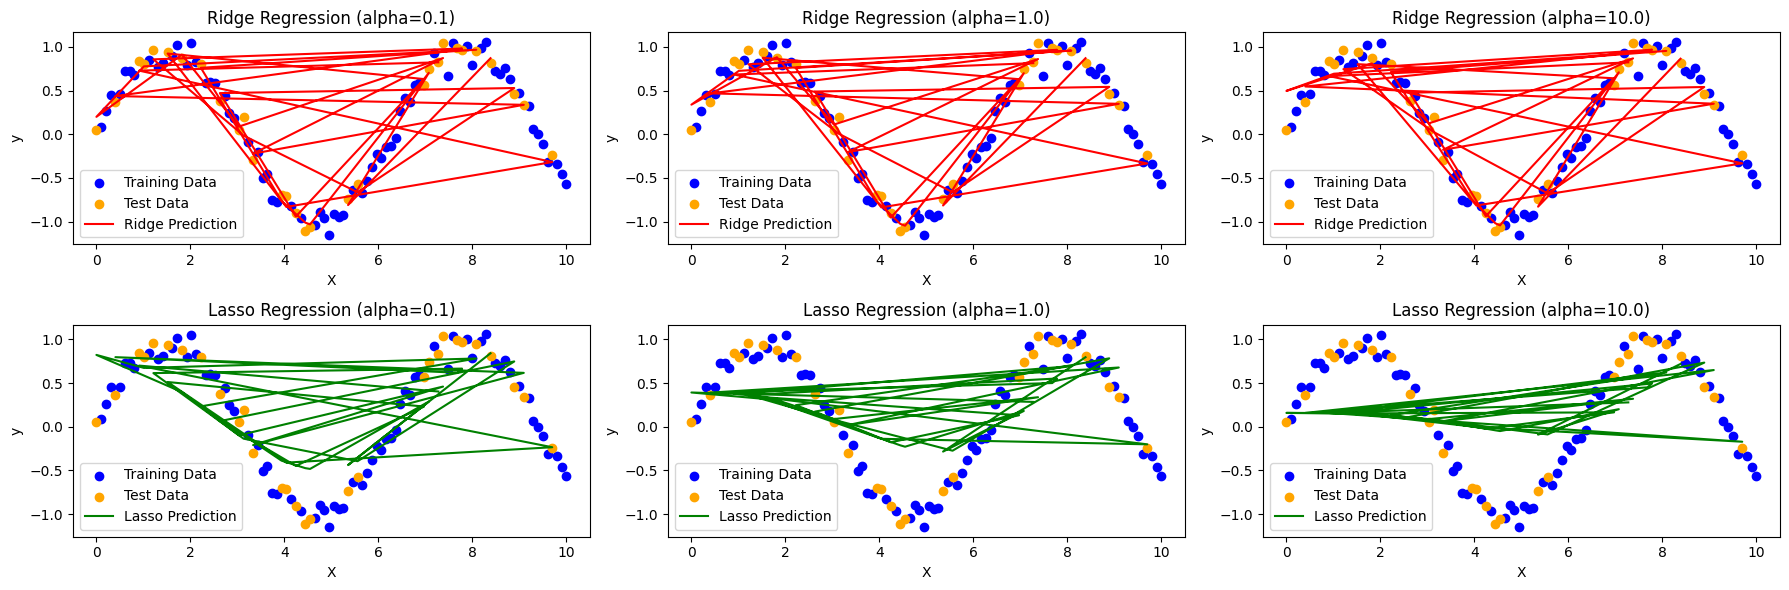

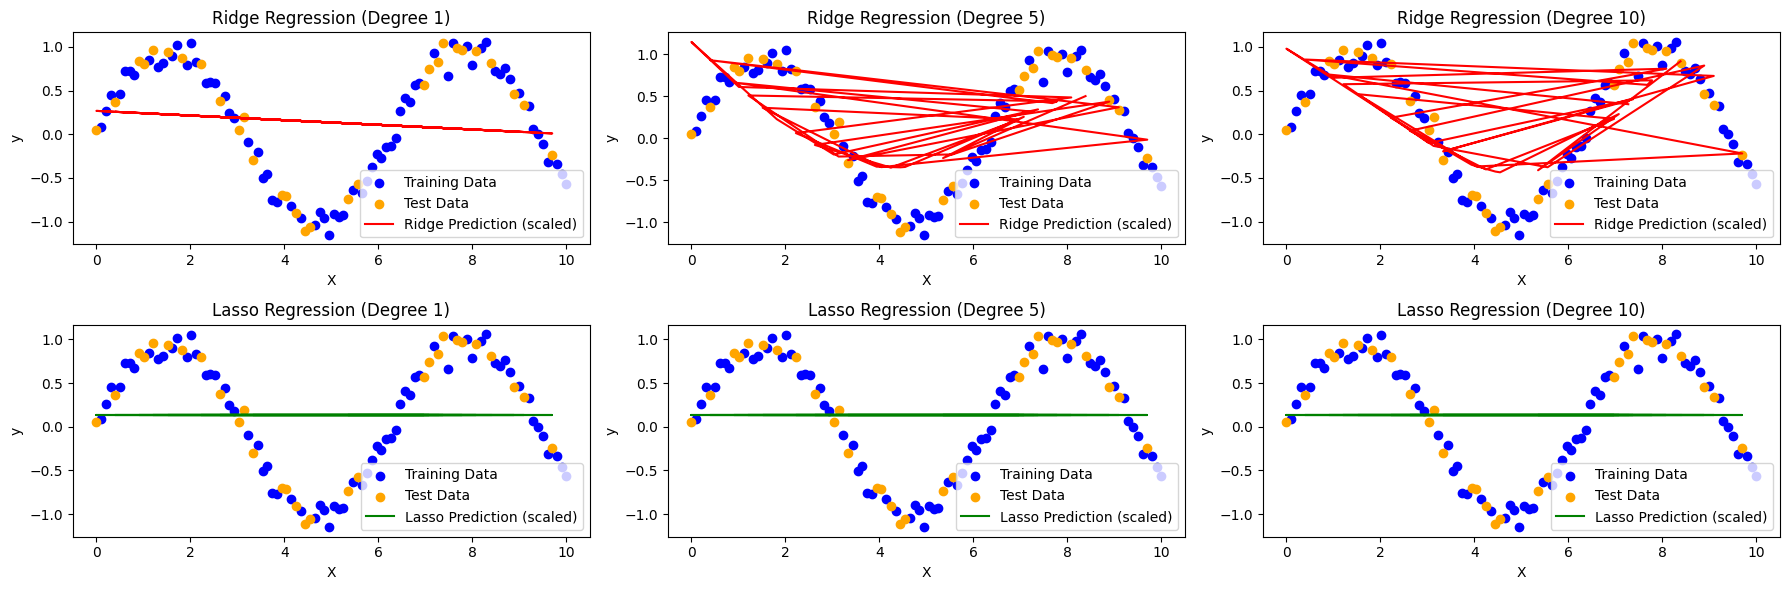

Ridge Regression (alpha=0.1) MSE: 0.007014447564439474
Lasso Regression (alpha=0.1) MSE: 0.14784230981601162
Ridge Regression (alpha=1.0) MSE: 0.010738060769816874
Lasso Regression (alpha=1.0) MSE: 0.23403867781101603
Ridge Regression (alpha=10.0) MSE: 0.016986937766313527
Lasso Regression (alpha=10.0) MSE: 0.33655384506665986
Scaled Ridge Regression (Degree 1) MSE: 0.5112574390581128
Scaled Lasso Regression (Degree 1) MSE: 0.5017611922761173
Scaled Ridge Regression (Degree 5) MSE: 0.2563895421928682
Scaled Lasso Regression (Degree 5) MSE: 0.5017611922761173
Scaled Ridge Regression (Degree 10) MSE: 0.1857788088143203
Scaled Lasso Regression (Degree 10) MSE: 0.5017611922761173


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.50116e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.658e+00, tolerance: 3.007e-03
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.50116e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# 1. 生成人工数据
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)  # 添加噪声的正弦函数
X = X[:, np.newaxis]  # 转换为列向量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. 训练线性回归模型（多项式特征）
degrees = [1, 5, 10]  # 不同的多项式度数
plt.figure(figsize=(18, 6))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # 线性回归模型
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # 预测
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    # 绘制结果
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='orange', label='Test Data')
    plt.plot(X_test, y_test_pred, color='red', label='Model Prediction')
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

# 3. 应用正则化（Ridge 和 Lasso）
alphas = [0.1, 1.0, 10.0]  # 不同的正则化强度
plt.figure(figsize=(18, 6))

for i, alpha in enumerate(alphas):
    # Ridge回归
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_poly_train, y_train)
    y_test_pred_ridge = ridge_model.predict(X_poly_test)

    # Lasso回归
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_poly_train, y_train)
    y_test_pred_lasso = lasso_model.predict(X_poly_test)

    # 绘制结果
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='orange', label='Test Data')
    plt.plot(X_test, y_test_pred_ridge, color='red', label='Ridge Prediction')
    plt.title(f'Ridge Regression (alpha={alpha})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    plt.subplot(2, 3, i + 4)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='orange', label='Test Data')
    plt.plot(X_test, y_test_pred_lasso, color='green', label='Lasso Prediction')
    plt.title(f'Lasso Regression (alpha={alpha})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

# 4. 使用特征缩放的 Lasso 和 Ridge 模型
plt.figure(figsize=(18, 6))

for i, degree in enumerate(degrees):
    # 使用 make_pipeline 创建带有特征缩放的 Ridge 模型
    ridge_model_scaled = make_pipeline(PolynomialFeatures(degree=degree), 
                                       StandardScaler(), 
                                       Ridge(alpha=0.1, max_iter=10000))
    ridge_model_scaled.fit(X_train, y_train)
    y_test_pred_ridge_scaled = ridge_model_scaled.predict(X_test)

    # 使用 make_pipeline 创建带有特征缩放的 Lasso 模型
    lasso_model_scaled = make_pipeline(PolynomialFeatures(degree=degree), 
                                       StandardScaler(), 
                                       Lasso(alpha=0.1, max_iter=10000))
    lasso_model_scaled.fit(X_train, y_train)
    y_test_pred_lasso_scaled = lasso_model_scaled.predict(X_test)

    # 绘制结果
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='orange', label='Test Data')
    plt.plot(X_test, y_test_pred_ridge_scaled, color='red', label='Ridge Prediction (scaled)')
    plt.title(f'Ridge Regression (Degree {degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    plt.subplot(2, 3, i + 4)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='orange', label='Test Data')
    plt.plot(X_test, y_test_pred_lasso_scaled, color='green', label='Lasso Prediction (scaled)')
    plt.title(f'Lasso Regression (Degree {degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

# 计算均方误差
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_poly_train, y_train)
    y_test_pred_ridge = ridge_model.predict(X_poly_test)
    print(f'Ridge Regression (alpha={alpha}) MSE: {mean_squared_error(y_test, y_test_pred_ridge)}')

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_poly_train, y_train)
    y_test_pred_lasso = lasso_model.predict(X_poly_test)
    print(f'Lasso Regression (alpha={alpha}) MSE: {mean_squared_error(y_test, y_test_pred_lasso)}')

# 计算带特征缩放的均方误差
for alpha in [0.1]:  # 只计算特征缩放下的 alpha=0.1
    for degree in degrees:
        ridge_model_scaled = make_pipeline(PolynomialFeatures(degree=degree), 
                                           StandardScaler(), 
                                           Ridge(alpha=alpha, max_iter=10000))
        ridge_model_scaled.fit(X_train, y_train)
        y_test_pred_ridge_scaled = ridge_model_scaled.predict(X_test)
        print(f'Scaled Ridge Regression (Degree {degree}) MSE: {mean_squared_error(y_test, y_test_pred_ridge_scaled)}')

        lasso_model_scaled = make_pipeline(PolynomialFeatures(degree=degree), 
                                           StandardScaler(), 
                                           Lasso(alpha=alpha, max_iter=10000))
        lasso_model_scaled.fit(X_train, y_train)
        y_test_pred_lasso_scaled = lasso_model_scaled.predict(X_test)
        print(f'Scaled Lasso Regression (Degree {degree}) MSE: {mean_squared_error(y_test, y_test_pred_lasso_scaled)}')
